In [2]:
import scanpy as sc
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import seaborn as sns
from matplotlib import colors
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

# Data Combine

In [3]:
GSE144236 = sc.read_h5ad('GSE144236_scRNAseq_count.h5ad')
GSE144236 

AnnData object with n_obs × n_vars = 1573 × 27998
    obs: 'Sample', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [4]:
GSE144236.obs['DataID'] = 'GSE144236'

In [5]:
GSE254890 = sc.read_h5ad('GSE254890/GSE254890_scRNAseq_mouse_cell_2.h5ad')
GSE254890

AnnData object with n_obs × n_vars = 23972 × 31053
    obs: 'Sample', 'Cell', 'Tumor', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'hgene_sum', 'mgene_sum', 'count_sum', 'hgene_pct'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    layers: 'counts'

In [6]:
GSE254890.obs['DataID'] = 'GSE254890'

In [7]:
GSE110501 = sc.read_h5ad('GSE110501_scRNAseq_count_3.h5ad')
GSE110501

AnnData object with n_obs × n_vars = 19362 × 24491
    obs: 'Sample', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [8]:
GSE110501.obs['DataID'] = 'GSE110501'

In [9]:
import anndata as ad
adata = ad.concat([GSE144236, GSE254890, GSE110501])
adata

AnnData object with n_obs × n_vars = 44907 × 21093
    obs: 'Sample', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'DataID'

In [12]:
adata.layers['Count'] = adata.X.copy()

In [13]:
adata.write_h5ad('Xenograft_combined_counts.h5ad')

# Quality_control

In [14]:
#Quality control
adata.var['mt'] = adata.var_names.str.startswith('mt-')  
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

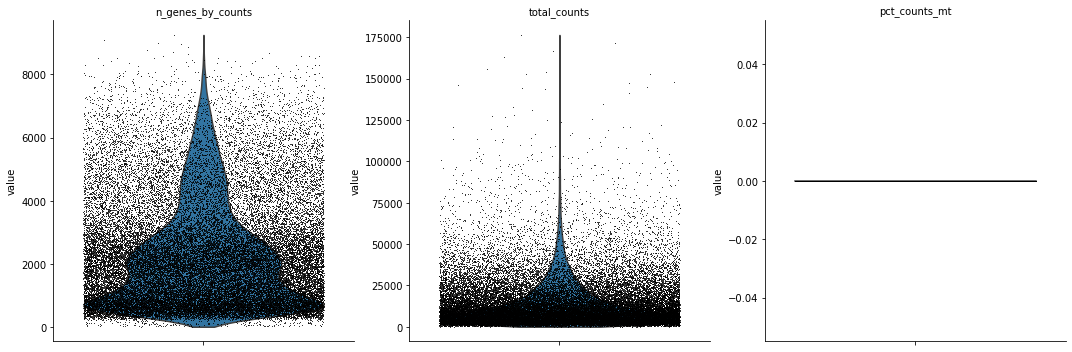

In [15]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


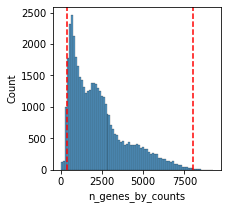

In [16]:
fig, ax = plt.subplots(figsize=(3, 3))
p3 = sns.histplot(adata.obs['n_genes_by_counts'], kde=False)
plt.axvline(x=400,linestyle='--',color='red')
plt.axvline(x=8000,linestyle='--',color='red')

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


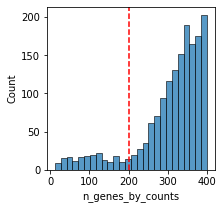

In [17]:
fig, ax = plt.subplots(figsize=(3, 3))
p3 = sns.histplot(adata.obs['n_genes_by_counts'][adata.obs['n_genes_by_counts']<400], kde=False)
plt.axvline(x=200,linestyle='--',color='red')


/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


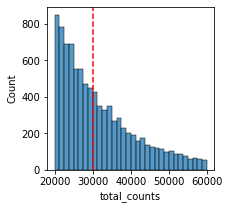

In [18]:
fig, ax = plt.subplots(figsize=(3, 3))
p3 = sns.histplot(adata.obs['total_counts'][(adata.obs['total_counts']>20000)&(adata.obs['total_counts']<60000)], kde=False)
plt.axvline(x=30000,linestyle='--',color='red')


/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


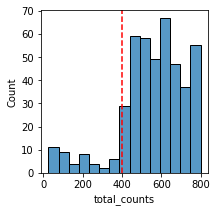

In [19]:
fig, ax = plt.subplots(figsize=(3, 3))
p3 = sns.histplot(adata.obs['total_counts'][adata.obs['total_counts']<800], kde=False)
plt.axvline(x=400,linestyle='--',color='red')

In [20]:
adata2_m = adata[(adata.obs.n_genes_by_counts > 200)&(adata.obs.n_genes_by_counts < 8500), :].copy()
adata2_m = adata2_m[(adata2_m.obs.total_counts > 400)&(adata2_m.obs.total_counts < 30000), :].copy()

adata2_m

AnnData object with n_obs × n_vars = 39868 × 21093
    obs: 'Sample', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'DataID'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    layers: 'Count'

# Normalization

In [21]:
sc.pp.normalize_total(adata2_m, target_sum=1e4)
sc.pp.log1p(adata2_m)

In [23]:
adata2_m.write_h5ad('Xenograft_combined_normalized.h5ad',compression='gzip')

# scVI

In [40]:
sc.pp.highly_variable_genes(adata2_m, flavor = 'seurat_v3', n_top_genes=2000, layer = "Count", 
                            subset = False, inplace=True)

In [41]:
import scvi
scvi.model.SCVI.setup_anndata(adata2_m, layer = 'Count', batch_key='Sample')
vae = scvi.model.SCVI(adata2_m)
vae.train()

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/abc.py:98: FutureWarning: SparseDataset is deprecated and will be removed in late 2024. It has been replaced by the public classes CSRDataset and CSCDataset.

For instance checks, use `isinstance(X, (anndata.experimental.CSRDataset, anndata.experimental.CSCDataset))` instead.

For creation, use `anndata.experimental.sparse_dataset(X)` instead.

  return _abc_instancecheck(cls, instance)
GPU a

Epoch 1/208:   0%|          | 0/208 [00:00<?, ?it/s]

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/abc.py:98: FutureWarning: SparseDataset is deprecated and will be removed in late 2024. It has been replaced by the public classes CSRDataset and CSCDataset.

For instance checks, use `isinstance(X, (anndata.experimental.CSRDataset, anndata.experimental.CSCDataset))` instead.

For creation, use `anndata.experimental.sparse_dataset(X)` instead.

  return _abc_instancecheck(cls, instance)


Epoch 208/208: 100%|██████████| 208/208 [1:12:09<00:00, 21.08s/it, v_num=1, train_loss_step=7.48e+3, train_loss_epoch=6.8e+3]

`Trainer.fit` stopped: `max_epochs=208` reached.


Epoch 208/208: 100%|██████████| 208/208 [1:12:09<00:00, 20.82s/it, v_num=1, train_loss_step=7.48e+3, train_loss_epoch=6.8e+3]


In [42]:
SCVI_LATENT_KEY = "X_scVI"
adata2_m.obsm[SCVI_LATENT_KEY] = vae.get_latent_representation(adata2_m)

In [43]:
sc.pp.neighbors(adata2_m, use_rep = SCVI_LATENT_KEY)
sc.tl.umap(adata2_m)

In [45]:
adata2_m.write_h5ad('Xenograft_combined_normalized_after_scVI.h5ad',compression='gzip')

# Cell typing by scANVI

In [49]:
human_mouse = pd.read_table('/common/sheny2/rat_data/human_mouse.txt')
human_mouse['Mouse_ID']= human_mouse['Mouse_ID'].astype('str')
human_mouse = human_mouse.loc[human_mouse['Mouse_ID']!='nan',:]
Map = dict(zip(human_mouse['Mouse_name'],human_mouse['Gene_name']))
#Map mouse gene to human gene
adata2_m.var['hgene']= adata2_m.var_names.map(Map)
adata2_m.var['hgene'] = adata2_m.var['hgene'].astype('str')
adata2 = adata2_m[:,adata2_m.var['hgene']!='nan'].copy()

adata2.var['mgene'] = adata2.var_names
adata2.var_names = adata2.var['hgene']
adata2.var_names_make_unique()

In [57]:
#Load reference
ref_data = sc.read_h5ad('scRNAseq_pancan_ref_2000.h5ad')
#Mark batch
ref_data.obs['DatasampleID'] = ref_data.obs['Sample_ID_new'].copy()
adata2.obs['DatasampleID'] = adata2.obs['Sample'].copy()
#Combine
adata_all = adata2.concatenate(ref_data)
#Mark cell type for scANVI
adata_all.obs['Celltype3']=adata_all.obs['Celltype3'].astype('str')
adata_all.obs.loc[adata_all.obs['Celltype3']=='nan','Celltype3']='Unknown'

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/anndata/_core/anndata.py:1823: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/anndata/_core/merge.py:1348: UserWarning: Only some AnnData objects have `.raw` attribute, not concatenating `.raw` attributes.
  warn(


In [61]:
scvi.model.SCVI.setup_anndata(adata_all, batch_key='DatasampleID')
vae = scvi.model.SCVI(adata_all)
vae.train()

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scvi/data/fields/_base_field.py:64: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 1/53:   0%|          | 0/53 [00:00<?, ?it/s]

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 53/53: 100%|██████████| 53/53 [34:39<00:00, 39.46s/it, v_num=1, train_loss_step=3.82e+3, train_loss_epoch=3.86e+3]

`Trainer.fit` stopped: `max_epochs=53` reached.


Epoch 53/53: 100%|██████████| 53/53 [34:39<00:00, 39.23s/it, v_num=1, train_loss_step=3.82e+3, train_loss_epoch=3.86e+3]


In [62]:
lvae = scvi.model.SCANVI.from_scvi_model(vae, adata = adata_all, unlabeled_category = 'Unknown',
                                        labels_key = 'Celltype3')

lvae.train(max_epochs=20, n_samples_per_label=100)

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scvi/data/fields/_base_field.py:64: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)


INFO     Training for 20 epochs.                                                                                   


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 1/20:   0%|          | 0/20 [00:00<?, ?it/s]

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scvi/module/_scanvae.py:286: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scvi/module/_scanvae.py:286: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)


Epoch 2/20:   5%|▌         | 1/20 [01:15<23:59, 75.76s/it, v_num=1, train_loss_step=3.92e+3, train_loss_epoch=4.05e+3]

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scvi/module/_scanvae.py:286: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)


Epoch 20/20: 100%|██████████| 20/20 [22:00<00:00, 66.50s/it, v_num=1, train_loss_step=3.99e+3, train_loss_epoch=4.03e+3]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 20/20: 100%|██████████| 20/20 [22:00<00:00, 66.02s/it, v_num=1, train_loss_step=3.99e+3, train_loss_epoch=4.03e+3]


In [64]:
adata_all.obs['Celltype3_predicted'] = lvae.predict(adata_all)
adata_all.obsm["X_scANVI_subcell"] = lvae.get_latent_representation()

In [80]:
#Mapping of different level cell type
Celltype = pd.read_excel('Three_level_celltype_map.xlsx')
#Separate xenograft data
adata_noref = adata_all[adata_all.obs['Celltype3']=='Unknown',:].copy()
adata_noref.obs_names = [name[0:-2] for name in adata_noref.obs_names]
#Copy cell type to the prvious anndata
adata2_m.obs['Celltype3'] = adata_noref.obs['Celltype3_predicted'].copy()
Map1 = dict(zip(Celltype['Celltype3'],Celltype['Celltype1']))
Map2 = dict(zip(Celltype['Celltype3'],Celltype['Celltype2']))
adata2_m.obs['Celltype1'] = adata2_m.obs['Celltype3'].map(Map1)
adata2_m.obs['Celltype2'] = adata2_m.obs['Celltype3'].map(Map2)

In [84]:
adata2_m.write_h5ad('Xenograft_combined_normalized_after_scVI.h5ad',compression='gzip')

# Signature Calculation

In [4]:
adata2_m = sc.read_h5ad('Xenograft_combined_normalized_after_scVI.h5ad')
adata2_m

AnnData object with n_obs × n_vars = 38418 × 21093
    obs: 'Sample', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'DataID', 'YchrS_mus', 'Sample_type', '_scvi_batch', '_scvi_labels', 'Celltype3', 'Celltype1', 'Celltype2'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'hgene'
    uns: 'Celltype1_colors', 'Celltype2_colors', 'Celltype3_colors', 'DataID_colors', 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'log1p', 'neighbors', 'umap'
    obsm: 'X_scVI', 'X_umap'
    layers: 'Count'
    obsp: 'connectivities', 'distances'

In [5]:
gene_info = pd.read_table('Ensembl_GRCm39.txt')
gene_info = gene_info.loc[gene_info['Chromosome/scaffold name']=='Y',:].copy()
Ychr_genes = gene_info.loc[~gene_info['Gene name'].isna(),'Gene name'].tolist()
Ychr_genes = list(set(Ychr_genes).intersection(adata2_m.var_names))
sc.tl.score_genes(
        adata2_m,
        Ychr_genes,
        ctrl_size=50,
        gene_pool=None,
        n_bins=25,
        score_name='YchrS_mus',
        random_state=0,
        copy=False,
        use_raw=None
    )

In [14]:
#Scale scores
from sklearn import preprocessing
scaled_scores = pd.DataFrame(preprocessing.scale(adata2_m.obs['YchrS_mus']),
                             index = adata2_m.obs_names,columns = ['YchrS_mus'])
adata2_m.obs['YchrS_mus_scaled'] = scaled_scores['YchrS_mus'].copy()

# Bar plot

In [7]:
mapp = {'GSE110501':'WTY_COLO205',
'GSE254890':'LOY_SW480',
'GSE144236':'Female_mice',
'GSE141533':'GSE141533'}
adata2_m.obs['Sample_type'] = adata2_m.obs['DataID'].map(mapp)
adata2_m.obs['Sample_type'] = adata2_m.obs['Sample_type'].astype('str')
adata2_m.obs.loc[adata2_m.obs['Sample'].str.startswith('heart'),'Sample_type']='Male_normal_tissue'

In [13]:
celltypemap = {'Epithelial_cell':'Epithelium',
               'Fibroblast':'Fibroblast',
                'CD4+_T_cell':'Immune_cell', 'CD8+_T_cell':'Immune_cell',
               'NK_cell':'Immune_cell','ILC':'Immune_cell', 'MAIT':'Immune_cell',
               'B_cell':'Immune_cell','Plasma_cell':'Immune_cell',
                'Macrophage':'Myeloid_cell',
               'Mast_cell':'Myeloid_cell', 'Dendritic_cell':'Myeloid_cell', 
               'Monocyte':'Myeloid_cell','pDC':'Myeloid_cell',
            
               'Endothelial_cel':'Endothelium'}

adata2_m.obs['Combined_celltype'] = adata2_m.obs['Celltype2'].map(celltypemap)
adata2_m.obs['Combined_celltype'] = adata2_m.obs['Combined_celltype'].astype('str')

In [18]:
celltypes =['Endothelium','Fibroblast','Myeloid_cell']
pale = {
    'LOY_SW480':'#ED665D',
    'Male_normal_tissue':'#729ECE',
    'Female_mice':'#FF9E4A',
}
Group_order = ['Female_mice','LOY_SW480','Male_normal_tissue']

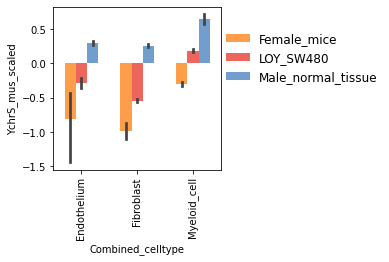

In [24]:
#ExtendedData_Fig9f
fig, ax = plt.subplots(1,1,figsize=(3,3))#,width_ratios=(60,1))
ax.grid(False)
sns.barplot(data=adata2_m.obs.loc[adata2_m.obs['Sample_type'].isin(Group_order), :],
            x='Combined_celltype', y='YchrS_mus_scaled',hue='Sample_type',
            width=0.6,saturation=1,order=celltypes,palette=pale,hue_order=Group_order,
            ax=ax)
plt.legend(loc = (1,0.5), fontsize = 12, frameon=False)
plt.xticks(rotation=90)
plt.savefig('ExtendedData_Fig9f_Xenograft_YchrS_mus_barplot.pdf', bbox_inches='tight', dpi=300)